# 웹 스크레이핑을 사용한 데이터 분석

## 4.1 팬더스로 상장법인 목록 읽기

한국거래소 기업공시채널에 접속해 '상장법인상세정보' -> '상장법인목록'으로 이동해서 xlsx 파일을 다운 받는다.

xls 파일의 내부는 html 형식으로 되어있기 때문에 `read_html`을 이용해 데이터를 불러온다.

`read_excel` 함수를 이용하기 위해서는 xlsx 데이터 형태로 변환해서 불러와야 한다.

### `read_html()`

html 파일 내부의 table 을 분석해서 데이터프레임으로 반환한다.

In [1]:
import pandas as pd
krx_list = pd.read_html('./data/issues_list.xls')
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,싸이버원,356890,소프트웨어 개발 및 공급업,보안관제 및 보안컨설팅 등,2021-03-11,12월,육동현,http://www.cyberone.kr/,서울특별시
1,프레스티지바이오로직스,334970,의약품 제조업,바이오시밀러 제조,2021-03-11,12월,양재영,http://www.prestigebiologics.com,충청북도
2,나노씨엠에스,247660,전자부품 제조업,"근적외선 흡수/반사 안료, 자외선 유기형광 안료, 적외선 발광체",2021-03-09,12월,김시석,http://www.nanocms.co.kr,충청남도
3,하나머스트7호스팩,372290,금융 지원 서비스업,기업인수목적,2021-03-05,12월,곽제훈,NaN,서울특별시
4,IBKS제15호스팩,373200,금융 지원 서비스업,기업 인수 합병,2021-02-26,12월,박광열,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...
2424,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2425,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2426,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2427,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


map 은 값을 대체하는 역할을 함. {} 안에 원래 데이터가 들어간다. {} 안에는 데이터를 포메팅 할 수 있는 문자열일 들어갈 수 있다.

In [2]:
# format 종목코드

krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format)
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,싸이버원,356890,소프트웨어 개발 및 공급업,보안관제 및 보안컨설팅 등,2021-03-11,12월,육동현,http://www.cyberone.kr/,서울특별시
1,프레스티지바이오로직스,334970,의약품 제조업,바이오시밀러 제조,2021-03-11,12월,양재영,http://www.prestigebiologics.com,충청북도
2,나노씨엠에스,247660,전자부품 제조업,"근적외선 흡수/반사 안료, 자외선 유기형광 안료, 적외선 발광체",2021-03-09,12월,김시석,http://www.nanocms.co.kr,충청남도
3,하나머스트7호스팩,372290,금융 지원 서비스업,기업인수목적,2021-03-05,12월,곽제훈,NaN,서울특별시
4,IBKS제15호스팩,373200,금융 지원 서비스업,기업 인수 합병,2021-02-26,12월,박광열,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...
2424,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2425,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2426,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2427,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [3]:
# download corp list from url

df = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')[0]
df['종목코드'] = df['종목코드'].map('{:06d}'.format)
df = df.sort_values(by='종목코드') # use ascending=False to set descending order
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
928,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,박기환,http://www.dong-wha.co.kr,서울특별시
1509,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,이기복,http://www.krmotors.com,경상남도
1516,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
1536,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
36,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
707,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
1012,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,갈지휘,http://www.snk-corp.co.jp,일본
1639,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩
1662,소마젠,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,Ryan W. Kim (김운봉),NaN,미국


## 4.2 웹에서 일별 시세 구하기

2021년 1월 7일 이후 urlopen 을 이용한 크롤링이 차단되었다. User-Agent 정보를 헤더에 포함해야 크롤링이 가능하다.

https://codingmoonkwa.tistory.com/265

속도가 훨씬 느린데 해결책은??

In [27]:
# Get price data from Naver Finance with requests module
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise_day.nhn?code=119650&page=1'
doc = requests.get(url, headers={'User-agent': 'Mozilla/5.0'})

html = BeautifulSoup(doc.text, 'lxml')
pgrr = html.find('td', class_='pgRR')

pgrr

<td class="pgRR">
<a href="/item/sise_day.nhn?code=119650&amp;page=275">맨뒤
				<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
</a>
</td>

In [28]:
# Prettify HTML text

print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.nhn?code=119650&amp;page=275">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [29]:
# get html property

pgrr.a['href']

'/item/sise_day.nhn?code=119650&page=275'

In [30]:
# parse string

s = pgrr.a['href'].split('=')
s

['/item/sise_day.nhn?code', '119650&page', '275']

In [33]:
# get total pages

lastPage = s[-1]
lastPage

'275'

### 4.4.4 전체 페이지 읽어오기

앞에서 사용한 마지막 페이지를 구하는 코드와 `read_html` 을 이용해서 종목의 전체 일별 시세를 구할 수 있다.
생각보다 오래걸려서 정상 작동 여부를 확인 할 수 있는 `print` 를 하나 넣어도 된다.

In [52]:
# Making function for fetching stock data

from bs4 import BeautifulSoup
import requests
import pandas as pd

sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=119650'

def fetchStockPricePerPage(page):
    page_url = '{}&page={}'.format(sise_url, page)
    with requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}) as doc:
        print('page %d fetching' %(page))
        return pd.read_html(doc.text, header=0)[0].dropna()
    
testParsedData = fetchStockPricePerPage(1)
testParsedData
    

page 1 fetching


,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.03.12,8180.0,430.0,8000.0,8270.0,7900.0,347758.0
2,2021.03.11,7750.0,250.0,7600.0,7930.0,7590.0,227796.0
3,2021.03.10,7500.0,30.0,7570.0,7820.0,7490.0,165629.0
4,2021.03.09,7530.0,180.0,7700.0,7740.0,7180.0,305481.0
5,2021.03.08,7710.0,260.0,8000.0,8050.0,7710.0,160044.0
9,2021.03.05,7970.0,230.0,8090.0,8160.0,7770.0,232544.0
10,2021.03.04,8200.0,300.0,8450.0,8450.0,8100.0,218595.0
11,2021.03.03,8500.0,110.0,8280.0,8560.0,8280.0,181929.0
12,2021.03.02,8390.0,10.0,8400.0,8640.0,8290.0,273997.0
13,2021.02.26,8400.0,490.0,8880.0,8880.0,8200.0,409833.0


In [56]:
# Fetch all historical data

df = pd.DataFrame()

for page in range(1, int(lastPage) + 1):
    df = df.append(fetchStockPricePerPage(page))

df

page 1 fetching
page 2 fetching
page 3 fetching
page 4 fetching
page 5 fetching
page 6 fetching
page 7 fetching
page 8 fetching
page 9 fetching
page 10 fetching
page 11 fetching
page 12 fetching
page 13 fetching
page 14 fetching
page 15 fetching
page 16 fetching
page 17 fetching
page 18 fetching
page 19 fetching
page 20 fetching
page 21 fetching
page 22 fetching
page 23 fetching
page 24 fetching
page 25 fetching
page 26 fetching
page 27 fetching
page 28 fetching
page 29 fetching
page 30 fetching
page 31 fetching
page 32 fetching
page 33 fetching
page 34 fetching
page 35 fetching
page 36 fetching
page 37 fetching
page 38 fetching
page 39 fetching
page 40 fetching
page 41 fetching
page 42 fetching
page 43 fetching
page 44 fetching
page 45 fetching
page 46 fetching
page 47 fetching
page 48 fetching
page 49 fetching
page 50 fetching
page 51 fetching
page 52 fetching
page 53 fetching
page 54 fetching
page 55 fetching
page 56 fetching
page 57 fetching
page 58 fetching
page 59 fetching
page 6

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.03.12,8180.0,430.0,8000.0,8270.0,7900.0,347758.0
2,2021.03.11,7750.0,250.0,7600.0,7930.0,7590.0,227796.0
3,2021.03.10,7500.0,30.0,7570.0,7820.0,7490.0,165629.0
4,2021.03.09,7530.0,180.0,7700.0,7740.0,7180.0,305481.0
5,2021.03.08,7710.0,260.0,8000.0,8050.0,7710.0,160044.0
...,...,...,...,...,...,...,...
11,2010.02.04,34500.0,550.0,34200.0,34800.0,33000.0,85838.0
12,2010.02.03,35050.0,650.0,35100.0,37400.0,34100.0,197225.0
13,2010.02.02,34400.0,1400.0,33050.0,37950.0,32100.0,195625.0
1,2010.02.01,33000.0,2800.0,33100.0,34700.0,31350.0,369398.0


In [57]:
df.to_csv('./kc_cottrell.csv')

## 4.5 OHLC 와 캔들차트

### 4.5.2 종가 그래프 그리기

Fetching page 
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193 ,194 ,195 ,196 ,197 ,198 ,199 ,200 ,201 ,202 ,203 ,204 ,205 ,206 ,207 ,208 ,209 ,210 ,211 ,212 ,213 ,214 ,215 ,216 ,217 ,218 ,219

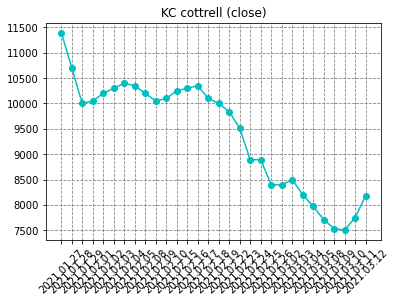

In [24]:
import pandas as pd
import requests
import sys
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

daily_price_url = 'https://finance.naver.com/item/sise_day.nhn?code=119650&page=1'
daily_price_sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=119650'


# 4.4.3 맨 뒤 페이지 숫자 구하기
with requests.get(daily_price_url, headers={'User-agent': 'Mozilla/5.0'}) as doc:
    html = BeautifulSoup(doc.text, 'lxml') # get html object
    pgrr = html.find('td', class_='pgRR') # get last page button
    s = pgrr.a['href'].split('=') # parse url address
    last_page = s[-1] # get last query string value
    
# 4.4.4 전체 페이지 읽어오기
print('Fetching page ')
df = pd.DataFrame()
for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(daily_price_sise_url, page)
    with requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}) as doc:
        print('%d'%(page), end=' ,')
        cur_table = pd.read_html(doc.text, header=0)[0]
        df = df.append(cur_table)

# 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30] # 최근 30개 데이터만 사용
df = df.sort_values(by='날짜') # 오름차순으로 정렬

# 최신 데이터 저장
df.to_csv('./data/kc_cottrell.csv')

# 날짜 종가 칼럼으로 차트 그리기
plt.title('KC cottrell (close)')
plt.xticks(rotation=45) # X축 label 을 45도 회전
plt.plot(df['날짜'], df['종가'], 'co-') # 'co-' means cyan, point: o, line
plt.grid(color='gray', linestyle='--')
plt.show()

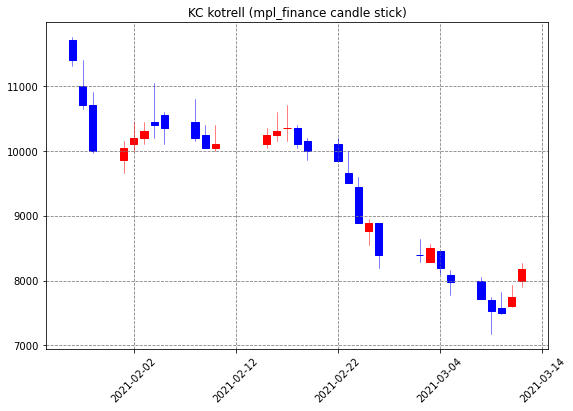

In [33]:
# old mpl_finanace

from mpl_finance import candlestick_ohlc
from matplotlib import dates as mdates
from datetime import datetime
import pandas as pd

df = pd.read_csv('./data/kc_cottrell.csv')

for idx in range(0, len(df)):
    # Return a datetime corresponding to date_string, parsed according to format.
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('KC kotrell (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45) # X축 label 을 45도 회전
plt.grid(color='gray', linestyle='--')
plt.show()


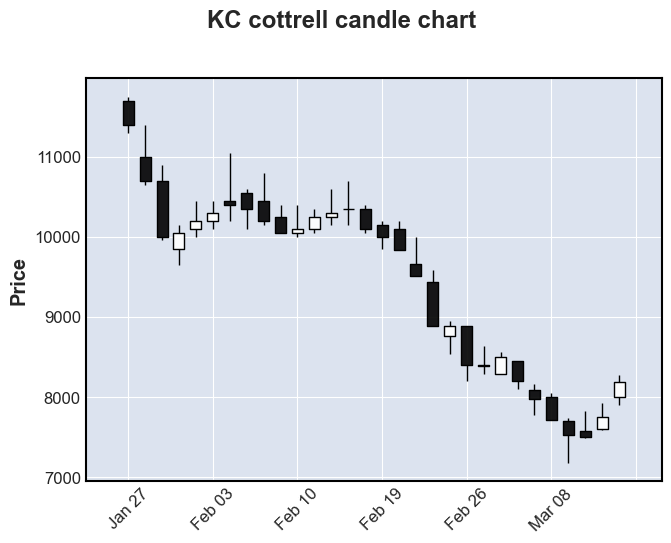

In [50]:
# new mplfinanace
import mplfinance as mpf

df = pd.read_csv('./data/kc_cottrell.csv')

df = df[['날짜', '시가', '고가', '저가', '종가', '거래량']]
df = df.rename(columns={'날짜': 'Date', '시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date) # DateTimeIndex tpe

mpf.plot(df, title='KC cottrell candle chart', type='candle')

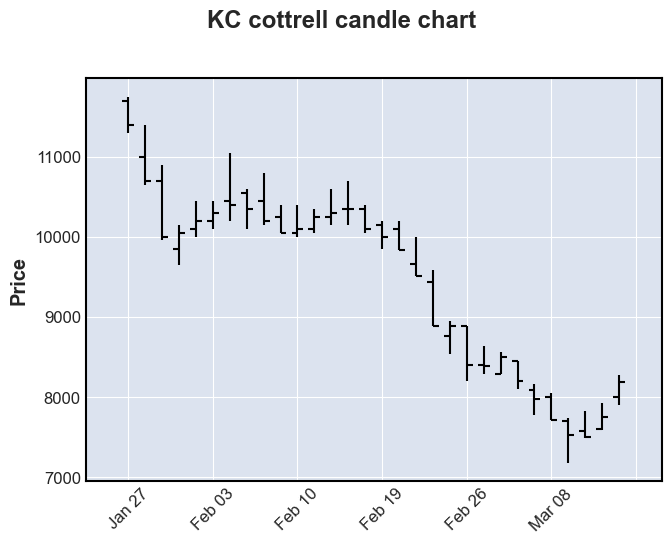

In [51]:
mpf.plot(df, title='KC cottrell candle chart', type='ohlc')

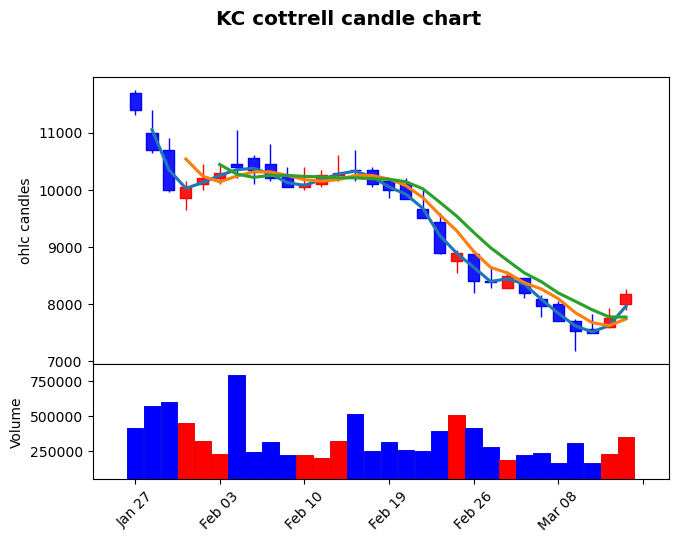

In [56]:
# Set color and move 

kwargs = dict(title='KC cottrell candle chart', type='candle',
              mav=(2,4,6), volume=True, ylabel='ohlc candles')

mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)

In [62]:
def hello_argv(*argv):
    print(*argv)
    
hello_argv(1, 2, 'a', 'b')

1 2 a b


In [70]:
def hello_args(**kwargs):
    for key, value in kwargs.items():
        print("{} = {}".format(key, value))

hello_args(name='kyu', nationality='kor')

name = kyu
nationality = kor
